In [1]:
import json
import csv
import re
import tweepy
import nltk
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_validate

In [2]:
consumer_key = 'JXCjFvSrGB6Ej4UtT5aNXKOSH' 
consumer_secret = 'oIL4sxvEMlMz7vj2Qx4v7t9AMdG9E7o9I5v9lzd10QHcV98Lw4' 
access_token = '1286322486414462977-2qxLDLBVXGPRsto0wUdizM4QVJRw8E' 
access_token_secret = 'kXIktV80cX5nomLLmYAaPXzPFyyg4oNsWGmqCXHEz3trR'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [3]:
data=pd.read_csv('C:/Users/Dell/Downloads/finaldata1.csv')

In [4]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize as wt
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
def preProcessing(tweets):
  tweets = tweets.tolist()
  ps = PorterStemmer()
  processedTweets = []
  punct = ['.',',','?','!',';',':','-','_','(',')','{','}','[',']','&','*','+','=',"'",'"','<','>','|','\\','/','`','~','@','#']
  sWords = set(stopwords.words('english'))
  for tweet in tweets:
    tweet = tweet.encode().decode()
    #tweet = tweet.decode('utf-8')
    tweet = tweet.encode('ascii', 'ignore').decode('ascii') #removing the emojis
    tweet = tweet.encode('latin-1', 'ignore').decode('latin-1')
    tweet = re.sub(r'http\S+', '', tweet) #removing the urls
    tweet = tweet.lower() #converting the text into lower cases
    words = wt(tweet) #tokenization
    processedWords = []
    for word in words:
      if word in punct or word in sWords:
        continue
      if words[words.index(word) - 1] != '@' and words[words.index(word) - 1] != '#':
        #processedWords.append(ps.stem(word)) #stemming
        processedWords.append(word)
    processedWords.remove(processedWords[0])
    processedTweets.append(' '.join(processedWords))
  return processedTweets

In [6]:
df = data.copy()
df.Tweet = preProcessing(df.Tweet)
df.head()

,Unnamed: 0,Tweet,User,createdTime,label
0,0,delay drinking water supply one hour bhrundava...,b'DeepakPawar55',2020-12-02 00:43:22,water
1,1,look disconnecting water electricity 3 months ...,b'Shrikanth567',2020-12-01 19:26:20,water
2,2,leakage dilsukhnagar past days situation near ...,b'narendra_kumar9',2020-12-01 14:03:01,water
3,3,water flowing prayer power church parsigutta m...,b'vinodkaparthi19',2020-12-01 09:39:32,water
4,4,govt telangana implement strict rules voting v...,b'rakeshreddy_ch',2020-12-01 08:41:44,water


In [7]:
pd.DataFrame(df.label.unique()).values

array([['water'],
       ['electricity'],
       ['police'],
       ['solid waste'],
       ['sanitation'],
       ['education'],
       ['environment'],
       ['economy'],
       ['fire'],
       ['health'],
       ['transport'],
       ['telecommunication']], dtype=object)

In [8]:
df1=df[['Tweet','label']].copy()
df1.columns=['tweet','label']

In [9]:
df2 = df1.copy()

In [10]:
pd.DataFrame(df2.label.unique())

,0
0,water
1,electricity
2,police
3,solid waste
4,sanitation
5,education
6,environment
7,economy
8,fire
9,health


In [11]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['label'].factorize()[0]
category_id_df = df2[['label', 'category_id']].drop_duplicates()

In [12]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

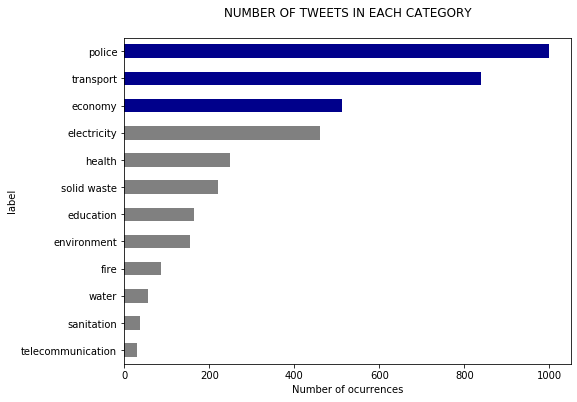

In [13]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('label').tweet.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF TWEETS IN EACH CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

# Count Vectorizer

In [15]:
vectorizer = CountVectorizer(ngram_range=(1, 3), 
                        stop_words='english')
# We transform each complaint into a vector
features = vectorizer.fit_transform(df2.tweet).toarray()

labels = df2.category_id

print("Each of the %d tweets is represented by %d features" %(features.shape))

Each of the 3808 tweets is represented by 79690 features


In [17]:
X = df2['tweet'] # Collection of documents
y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=1),
    ComplementNB(),
    DecisionTreeClassifier(random_state=0),
    SVC(),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
score=['f1_macro','f1_micro']
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_validate(model, features, labels, scoring=score, cv=CV)
    for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
        entries.append((model_name,f1_macro,f1_micro))
cv_df = pd.DataFrame(entries, columns=['model_name','f1_macro','f1_micro'])
cv_df


In [ ]:
f1_macro = cv_df.groupby('model_name').f1_macro.mean()
f1_micro = cv_df.groupby('model_name').f1_micro.mean()
acc = pd.concat([f1_macro,f1_micro], axis= 1, 
          ignore_index=True)
acc.columns = ['f1-macro_mean','f1-micro_mean']
acc=acc.sort_values(by=['f1-macro_mean'], ascending=False)
acc

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='model_name', y='f1_macro', 
            data=cv_df, 
            showmeans=True)
plt.title("f1-macro (cv = 5)\n", size=14);

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='model_name', y='f1_micro', 
            data=cv_df, 
            showmeans=True)
plt.title("f1-micro (cv = 5)\n", size=14);

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.2, 
                                                               random_state=1)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['label'].unique()))

# Min-df

In [ ]:
#final1=[]
#final2=[]
x=1
#print('Scores for min-df=2 are given below')
#print(acc)
while(x<=30):
    vectorizer = CountVectorizer(min_df=x,
                        ngram_range=(1, 3), 
                        stop_words='english',
                            )
    # We transform each complaint into a vector
    demo_features = vectorizer.fit_transform(df2.tweet).toarray()
    labels = df2.category_id
    print("\nFor min-df=",x,", each of the %d tweets is represented by %d features\n" %(demo_features.shape))
    
    X = df2['tweet'] # Collection of documents
    y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)
    models = [
    LinearSVC(max_iter=100000),
    LogisticRegression(random_state=0,max_iter=10000),
    DecisionTreeClassifier(random_state=0),
    ]

    # 5 Cross-validation
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))

    entries = []
    score=['f1_macro','f1_micro']
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_validate(model, demo_features, labels, scoring=score, cv=CV)
        i=0
        for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
            entries.append((i,model_name,f1_macro,f1_micro))
            i+=1
    cv_df = pd.DataFrame(entries, columns=['index','model_name','f1_macro','f1_micro'])
    f1_macro = cv_df.groupby('model_name').f1_macro.mean()
    f1_micro = cv_df.groupby('model_name').f1_micro.mean()
    demo_acc = pd.concat([f1_macro,f1_micro], axis= 1, ignore_index=True)
    demo_acc.columns = ['f1-macro_mean','f1-micro_mean']
    #demo_acc=demo_acc.sort_values(by=['f1-macro_mean'], ascending=False)
    print("Scores for min-df=",x," are given below:\n")
    print(demo_acc)
    l1=demo_acc['f1-macro_mean'].tolist()
    l2=demo_acc['f1-micro_mean'].tolist()
    l3=[]
    l3=[x]+l1+l2
    final1.append(l3)
    x+=1
    

In [ ]:
temp=pd.DataFrame(final1,columns=['mnf','DTC_f1-macro','LSVC_f1-macro','LR_f1-macro','DTC_f1-micro','LSVC_f1-micro','LR_f1-micro'])
temp.to_csv('scores from countvectorizer(mnf).csv')
temp

In [ ]:
temp.plot(x='min_df',y=['DTC_f1-macro','LSVC_f1-macro','LR_f1-macro'],marker='^',figsize=(10,5),ylim=(0.7,0.8));

## From above tests, better results are achieved when min-df=2

# Mnf

In [ ]:
final1=[]
w=500
#print('Scores for min-df=2 are given below')
#print(acc)
while(w<=20000):
    vectorizer = CountVectorizer(max_features=w,
                        ngram_range=(1, 3), 
                        stop_words='english',
                            )
    # We transform each complaint into a vector
    demo_features = vectorizer.fit_transform(df2.tweet).toarray()
    labels = df2.category_id
    print("\nFor max-featues=",w,", each of the %d tweets is represented by %d features\n" %(demo_features.shape))
    
    X = df2['tweet'] # Collection of documents
    y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)
    models = [
    LinearSVC(max_iter=100000),
    LogisticRegression(random_state=0,max_iter=10000),
    DecisionTreeClassifier(random_state=0),
    ]

    # 5 Cross-validation
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))

    entries = []
    score=['f1_macro','f1_micro']
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_validate(model, demo_features, labels, scoring=score, cv=CV)
        i=0
        for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
            entries.append((i,model_name,f1_macro,f1_micro))
            i+=1
    cv_df = pd.DataFrame(entries, columns=['index','model_name','f1_macro','f1_micro'])
    f1_macro = cv_df.groupby('model_name').f1_macro.mean()
    f1_micro = cv_df.groupby('model_name').f1_micro.mean()
    demo_acc = pd.concat([f1_macro,f1_micro], axis= 1, ignore_index=True)
    demo_acc.columns = ['f1-macro_mean','f1-micro_mean']
    #demo_acc=demo_acc.sort_values(by=['f1-macro_mean'], ascending=False)
    print("Scores for max features=",w," are given below:\n")
    print(demo_acc)
    l1=demo_acc['f1-macro_mean'].tolist()
    l2=demo_acc['f1-micro_mean'].tolist()
    l3=[]
    l3=[w]+l1+l2
    final1.append(l3)
    w+=500

In [ ]:
temp=pd.DataFrame(final1,columns=['mnf','DTC_f1-macro','LSVC_f1-macro','LR_f1-macro','DTC_f1-micro','LSVC_f1-micro','LR_f1-micro'])
temp.to_csv('scores from countvectorizer(mnf).csv')
temp

In [ ]:
temp.plot(x='mnf',y=['DTC_f1-macro','LSVC_f1-macro','LR_f1-macro'],marker='^',figsize=(10,5),ylim=(0.7,0.8));

## From above tests, better results are achieved when max-features=17000

# TF-IDF

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        ngram_range=(1, 3), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.tweet).toarray()

labels = df2.category_id

print("Each of the %d tweets is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
X = df2['tweet'] # Collection of documents
y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=1),
    ComplementNB(),
    DecisionTreeClassifier(random_state=0),
    SVC(),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
score=['f1_macro','f1_micro']
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_validate(model, features, labels, scoring=score, cv=CV)
    for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
        entries.append((model_name,f1_macro,f1_micro))
cv_df = pd.DataFrame(entries, columns=['model_name','f1_macro','f1_micro'])
cv_df

In [ ]:
f1_macro = cv_df.groupby('model_name').f1_macro.mean()
f1_micro = cv_df.groupby('model_name').f1_micro.mean()
acc = pd.concat([f1_macro,f1_micro], axis= 1, 
          ignore_index=True)
acc.columns = ['f1-macro_mean','f1-micro_mean']
acc=acc.sort_values(by=['f1-macro_mean'], ascending=False)
acc

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='model_name', y='f1_macro', 
            data=cv_df, 
            showmeans=True)
plt.title("F1-MACRO MEAN (cv = 5)\n", size=14);

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='model_name', y='f1_micro', 
            data=cv_df, 
            showmeans=True)
plt.title("F1-MICRO MEAN (cv = 5)\n", size=14);

# min-df

In [ ]:
final1=[]
#final2=[]
x=1
#print('Scores for min-df=2 are given below')
#print(acc)
while(x<=30):
    vectorizer = TfidfVectorizer(sublinear_tf=True,
                                 min_df=x,
                                 ngram_range=(1, 3),
                                 stop_words='english',
                                 )
    # We transform each complaint into a vector
    demo_features = vectorizer.fit_transform(df2.tweet).toarray()
    labels = df2.category_id
    print("\nFor min-df=",x,", each of the %d tweets is represented by %d features\n" %(demo_features.shape))
    
    X = df2['tweet'] # Collection of documents
    y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)
    models = [
    LinearSVC(max_iter=100000),
    LogisticRegression(random_state=0,max_iter=10000),
    DecisionTreeClassifier(random_state=0),
    ]

    # 5 Cross-validation
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))

    entries = []
    score=['f1_macro','f1_micro']
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_validate(model, demo_features, labels, scoring=score, cv=CV)
        i=0
        for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
            entries.append((i,model_name,f1_macro,f1_micro))
            i+=1
    cv_df = pd.DataFrame(entries, columns=['index','model_name','f1_macro','f1_micro'])
    f1_macro = cv_df.groupby('model_name').f1_macro.mean()
    f1_micro = cv_df.groupby('model_name').f1_micro.mean()
    demo_acc = pd.concat([f1_macro,f1_micro], axis= 1, ignore_index=True)
    demo_acc.columns = ['f1-macro_mean','f1-micro_mean']
    #demo_acc=demo_acc.sort_values(by=['f1-macro_mean'], ascending=False)
    print("Scores for min-df=",x," are given below:\n")
    print(demo_acc)
    l1=demo_acc['f1-macro_mean'].tolist()
    l2=demo_acc['f1-micro_mean'].tolist()
    l3=[]
    l3=[x]+l1+l2
    final1.append(l3)
    x+=1

In [ ]:
temp=pd.DataFrame(final1,columns=['min_df','DTC_f1-macro','LSVC_f1-macro','LR_f1-macro','DTC_f1-micro','LSVC_f1-micro','LR_f1-micro'])
temp.to_csv('scores from tf-idf.csv')
temp

In [ ]:
temp.plot(x='min_df',y=['DTC_f1-macro','LSVC_f1-macro','LR_f1-macro'],marker='^',figsize=(10,5),ylim=(0.7,0.8));

# From above tests, min-df=2 achieved better results

In [ ]:
final1=[]
w=500
#print('Scores for min-df=2 are given below')
#print(acc)
while(w<=20000):
    vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  max_features=w,
                                  ngram_range=(1, 3),
                                  stop_words='english',
                                  )
    # We transform each complaint into a vector
    demo_features = vectorizer.fit_transform(df2.tweet).toarray()
    labels = df2.category_id
    print("\nFor max-featues=",w,", each of the %d tweets is represented by %d features\n" %(demo_features.shape))
    
    X = df2['tweet'] # Collection of documents
    y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)
    models = [
    LinearSVC(max_iter=100000),
    LogisticRegression(random_state=0,max_iter=10000),
    DecisionTreeClassifier(random_state=0),
    ]

    # 5 Cross-validation
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))

    entries = []
    score=['f1_macro','f1_micro']
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_validate(model, demo_features, labels, scoring=score, cv=CV)
        i=0
        for f1_macro,f1_micro in zip(accuracies['test_f1_macro'],accuracies['test_f1_micro']):
            entries.append((i,model_name,f1_macro,f1_micro))
            i+=1
    cv_df = pd.DataFrame(entries, columns=['index','model_name','f1_macro','f1_micro'])
    f1_macro = cv_df.groupby('model_name').f1_macro.mean()
    f1_micro = cv_df.groupby('model_name').f1_micro.mean()
    demo_acc = pd.concat([f1_macro,f1_micro], axis= 1, ignore_index=True)
    demo_acc.columns = ['f1-macro_mean','f1-micro_mean']
    #demo_acc=demo_acc.sort_values(by=['f1-macro_mean'], ascending=False)
    print("Scores for max features=",w," are given below:\n")
    print(demo_acc)
    l1=demo_acc['f1-macro_mean'].tolist()
    l2=demo_acc['f1-micro_mean'].tolist()
    l3=[]
    l3=[w]+l1+l2
    final1.append(l3)
    w+=500

In [ ]:
temp=pd.DataFrame(final1,columns=['mnf','DTC_f1-macro','LSVC_f1-macro','LR_f1-macro','DTC_f1-micro','LSVC_f1-micro','LR_f1-micro'])
temp.to_csv('scores from tf-idf(mnf).csv')
temp

In [ ]:
temp.plot(x='mnf',y=['DTC_f1-macro','LSVC_f1-macro','LR_f1-macro'],marker='^',figsize=(10,5));

## From the above tests, better results are achieved when max-features=1800